In [ ]:
pip install keras
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from numpy import arange
from numpy import isnan
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import math
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score , precision_score , roc_auc_score ,roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


### [CM1] Data Pre-processing and Preparation

In [ ]:
df_covid= pd.read_csv("C:/Users/SAM/OneDrive - University of Waterloo/Spring 2021/ECE657A/Assignment 2/dkmacovid_train.csv")

df_covid_sorted = df_covid.sort_values(by=["State ID","Day"])
df_covid_sorted[['Confirmed', 'Deaths', 'Recovered']] = df_covid_sorted[['Confirmed', 'Deaths', 'Recovered']].astype(int)
df_covid_sorted = df_covid_sorted.round(2)

df_covid_sorted = df_covid_sorted.drop(['State'], axis=1)

df_covid_sorted['Resident Population 2020 Census']=df_covid_sorted['Resident Population 2020 Census'].str.replace(',','')
df_covid_sorted['Resident Population 2020 Census'] = df_covid_sorted['Resident Population 2020 Census'].astype(int)
df_covid_sorted['Population Density 2020 Census']=df_covid_sorted['Population Density 2020 Census'].str.replace(',','')

# Seperating the dependent and independent variables
X = df_covid_sorted.drop(['Confirmed', 'Deaths', 'Recovered'],axis=1)
y = df_covid_sorted.loc[:,['Confirmed', 'Deaths', 'Recovered']]

# declairing the y variable one for each label.
y_confirmed = y.loc[:,['Confirmed']]
y_deaths = y.loc[:,['Deaths']]
y_recovered = y.loc[:,['Recovered']]

#normalizing the training data before feeding it into the PCA and LDA algorithms.
sc = StandardScaler()
X = sc.fit_transform(X)


### [CM2] Classify the data using a Fully Connected Deep Neural Network using two hidden layers, ReLU activation functions and Softmax output layer for the classification decision

Epoch 1/100
100/100 [==============================] - 37s 41ms/step - loss: 0.4615 - accuracy: 0.8531 - val_loss: 0.1985 - val_accuracy: 0.9558
Epoch 2/100
100/100 [==============================] - 1s 6ms/step - loss: 0.1686 - accuracy: 0.9639 - val_loss: 0.1765 - val_accuracy: 0.9558
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1608 - accuracy: 0.9609 - val_loss: 0.1702 - val_accuracy: 0.9558
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1440 - accuracy: 0.9633 - val_loss: 0.1666 - val_accuracy: 0.9558
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1144 - accuracy: 0.9711 - val_loss: 0.1625 - val_accuracy: 0.9558
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1190 - accuracy: 0.9679 - val_loss: 0.1589 - val_accuracy: 0.9558
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1351 - accuracy: 0.9597 - val_loss: 0.1578 - val_accuracy: 0.95

Epoch 58/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0852 - accuracy: 0.9612 - val_loss: 0.1621 - val_accuracy: 0.9558
Epoch 59/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.9684 - val_loss: 0.1618 - val_accuracy: 0.9558
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.9598 - val_loss: 0.1668 - val_accuracy: 0.9558
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9575 - val_loss: 0.1684 - val_accuracy: 0.9558
Epoch 62/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9605 - val_loss: 0.1678 - val_accuracy: 0.9558
Epoch 63/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9711 - val_loss: 0.1616 - val_accuracy: 0.9558
Epoch 64/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9625 - val_loss: 0.1713 - val_accuracy:

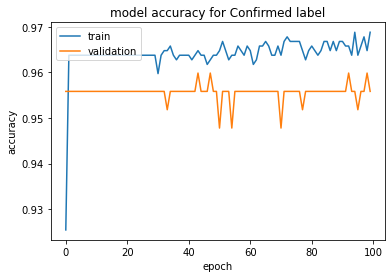

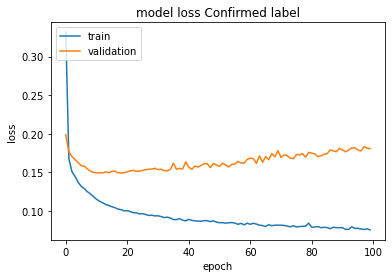

testing Accuracy for Confirmed label is: 95.65217391304348


In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#----------Confirmed------------#
ohe = OneHotEncoder()
yy = y_confirmed
yy = ohe.fit_transform(yy).toarray()
X_train,X_test,y_train,y_test = train_test_split(X,yy,test_size = 0.1, random_state = 98)

history_confirmed = model.fit(X_train, y_train, validation_split=0.20, epochs=100, batch_size=10)

# summarize history for accuracy
plt.plot(history_confirmed.history['accuracy'])
plt.plot(history_confirmed.history['val_accuracy'])
plt.title('model accuracy for Confirmed label')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_confirmed.history['loss'])
plt.plot(history_confirmed.history['val_loss']) 
plt.title('model loss Confirmed label')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred_confirmed = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred_confirmed)):
    pred.append(np.argmax(y_pred_confirmed[i]))
#Converting one hot encoded test label to label
test_confirmed = list()
for i in range(len(y_test)):
    test_confirmed.append(np.argmax(y_test[i]))
    
a = accuracy_score(pred,test_confirmed)
print('testing Accuracy for Confirmed label is:', a*100)

Epoch 1/100
100/100 [==============================] - 1s 7ms/step - loss: 0.4807 - accuracy: 0.8711 - val_loss: 0.3418 - val_accuracy: 0.8795
Epoch 2/100
100/100 [==============================] - 1s 6ms/step - loss: 0.2857 - accuracy: 0.8902 - val_loss: 0.2907 - val_accuracy: 0.8755
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2556 - accuracy: 0.9053 - val_loss: 0.2660 - val_accuracy: 0.8795
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.9003 - val_loss: 0.2642 - val_accuracy: 0.8956
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 0.9074 - val_loss: 0.2616 - val_accuracy: 0.8956
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.9043 - val_loss: 0.2584 - val_accuracy: 0.9116
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9094 - val_loss: 0.2646 - val_accuracy: 0.8956

Epoch 58/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1916 - accuracy: 0.9144 - val_loss: 0.2466 - val_accuracy: 0.9157
Epoch 59/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1893 - accuracy: 0.9104 - val_loss: 0.2471 - val_accuracy: 0.9237
Epoch 60/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1906 - accuracy: 0.9154 - val_loss: 0.2491 - val_accuracy: 0.9157
Epoch 61/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1897 - accuracy: 0.9174 - val_loss: 0.2465 - val_accuracy: 0.9076
Epoch 62/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9134 - val_loss: 0.2500 - val_accuracy: 0.9197
Epoch 63/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1927 - accuracy: 0.9074 - val_loss: 0.2465 - val_accuracy: 0.9237
Epoch 64/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1902 - accuracy: 0.9154 - val_loss: 0.2492 - val_accuracy:

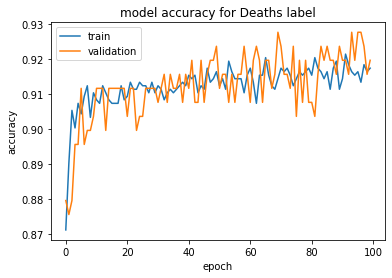

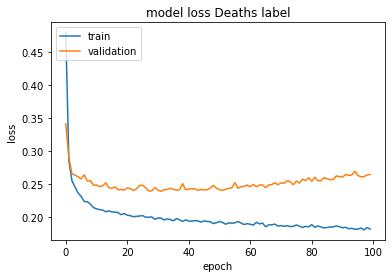

testing Accuracy for Deaths label is: 90.57971014492753


In [ ]:
#----------Deaths------------#
ohe = OneHotEncoder()
yy = y_deaths
yy = ohe.fit_transform(yy).toarray()
X_train,X_test,y_train,y_test = train_test_split(X,yy,test_size = 0.1, random_state = 98)

history_deaths = model.fit(X_train, y_train, validation_split=0.20, epochs=100, batch_size=10)

# summarize history for accuracy
plt.plot(history_deaths.history['accuracy'])
plt.plot(history_deaths.history['val_accuracy'])
plt.title('model accuracy for Deaths label')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_deaths.history['loss'])
plt.plot(history_deaths.history['val_loss']) 
plt.title('model loss Deaths label')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred_deaths = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred_deaths)):
    pred.append(np.argmax(y_pred_deaths[i]))
#Converting one hot encoded test label to label
test_deaths = list()
for i in range(len(y_test)):
    test_deaths.append(np.argmax(y_test[i]))
    
a = accuracy_score(pred,test_deaths)
print('testing Accuracy for Deaths label is:', a*100)

Epoch 1/100
100/100 [==============================] - 1s 7ms/step - loss: 1.0277 - accuracy: 0.7472 - val_loss: 0.5398 - val_accuracy: 0.7510
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3840 - accuracy: 0.8238 - val_loss: 0.4065 - val_accuracy: 0.8153
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3103 - accuracy: 0.8792 - val_loss: 0.3649 - val_accuracy: 0.8273
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.8953 - val_loss: 0.3323 - val_accuracy: 0.8394
Epoch 5/100
100/100 [==============================] - 1s 5ms/step - loss: 0.2520 - accuracy: 0.9053 - val_loss: 0.3265 - val_accuracy: 0.8353
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2333 - accuracy: 0.9174 - val_loss: 0.3152 - val_accuracy: 0.8514
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.9215 - val_loss: 0.3026 - val_accuracy: 0.8876

Epoch 58/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1414 - accuracy: 0.9456 - val_loss: 0.2535 - val_accuracy: 0.9237
Epoch 59/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1389 - accuracy: 0.9507 - val_loss: 0.2530 - val_accuracy: 0.9197
Epoch 60/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1378 - accuracy: 0.9486 - val_loss: 0.2485 - val_accuracy: 0.9157
Epoch 61/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1381 - accuracy: 0.9486 - val_loss: 0.2543 - val_accuracy: 0.9197
Epoch 62/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1375 - accuracy: 0.9476 - val_loss: 0.2528 - val_accuracy: 0.9237
Epoch 63/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1391 - accuracy: 0.9486 - val_loss: 0.2632 - val_accuracy: 0.9197
Epoch 64/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1363 - accuracy: 0.9496 - val_loss: 0.2752 - val_accuracy:

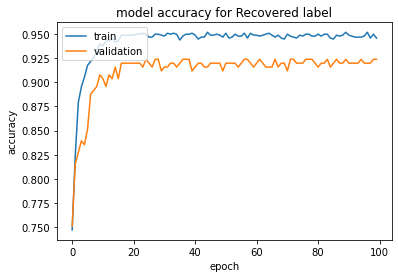

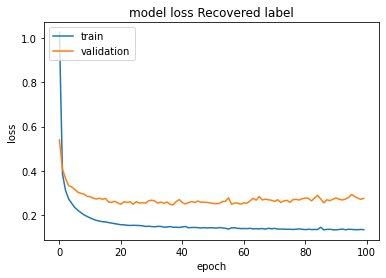

testing Accuracy for Recovered label is: 94.20289855072464


In [ ]:
#----------Recovered------------#
ohe = OneHotEncoder()
yy = y_recovered
yy = ohe.fit_transform(yy).toarray()
X_train,X_test,y_train,y_test = train_test_split(X,yy,test_size = 0.1, random_state = 98)

history_recovered = model.fit(X_train, y_train, validation_split=0.20, epochs=100, batch_size=10)

# summarize history for accuracy
plt.plot(history_recovered.history['accuracy'])
plt.plot(history_recovered.history['val_accuracy'])
plt.title('model accuracy for Recovered label')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_recovered.history['loss'])
plt.plot(history_recovered.history['val_loss']) 
plt.title('model loss Recovered label')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

y_pred_recovered = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred_recovered)):
    pred.append(np.argmax(y_pred_recovered[i]))
#Converting one hot encoded test label to label
test_recovered = list()
for i in range(len(y_test)):
    test_recovered.append(np.argmax(y_test[i]))
    
a = accuracy_score(pred,test_recovered)
print('testing Accuracy for Recovered label is:', a*100)

### [CM3]

In [ ]:
'''##------------- Defining some required functions --------------##'''

''' We are selecting Rectified Linear Unit (ReLU) function as the activation function for getting the outputs at the hidden layer. It is a simple function that gives output = 0 for any -ve values of input and output = input for values greater than 0.'''
def ReLU_activation_function(a):
    return np.maximum(a, 0)

''' In the case of multi-class classification, we represent the choice of class as a probability distribution over other possible classes. Therefore, we need to transform the output layer. We can do this by using Softmax function as an activation function of out output layer. Also, the derivative of softmax function is computationally  easy and cheap to calculate.'''
def softmax_activation_function(b):
    return np.exp(b) / np.sum(np.exp(b), axis = 1, keepdims = True)

''' In the algorithm of backpropagation  , an important step is to find the loss function to calibrate  the future weight and bias vectors. Since we are using softmax function as an activation function for output layer, we will calculate the loss using cross entropy loss function.'''
def cross_entropy_loss(probability_arr, y_out):
    indices = np.argmax(y_out, axis = 1).astype(int)
    pred_probability = probability_arr[np.arange(len(probability_arr)), indices]
    log_preds = np.log(pred_probability)
    loss = -1.0 * np.sum(log_preds) / len(log_preds)
    return loss

''' to avoid overfitting in predictive modeling, we will use L2 regularization. this will have the weights come closer to 0. it is always advised to use regularization for complex problems. '''
def L2_regularization(reg_lambda, w1, w2):
    w1_loss = 0.5 * reg_lambda * np.sum(w1 * w1)
    w2_loss = 0.5 * reg_lambda * np.sum(w2 * w2)
    return w1_loss + w2_loss

'''Our very own function for measuring the accuracy score.'''
def accuracy(predictions, labels):
    preds_correct_boolean =  np.argmax(predictions, 1) == np.argmax(labels, 1)
    correct_predictions = np.sum(preds_correct_boolean)
    accuracy = correct_predictions / predictions.shape[0]
    return accuracy

#----------Confirmed------------#
ohe = OneHotEncoder()
# change yy = y_deaths or y_confirmed for the Deaths and Confirmed labels respectively and RERUN the entire model for correct scores. 
yy = y_recovered
yy = ohe.fit_transform(yy).toarray()
x_train,x_test,y_train,y_test = train_test_split(X,yy,test_size = 0.10, random_state = 98)

'''##------------- Initializing few variables before we go to model training. --------------##'''

np.random.seed(12)
# number of different features to decide the number of nodes in input layer (LAYER 0).
num_feat = x_train.shape[1]
# number of nodes in the hidden layer (LAYER 1). 
hidden_nodes = 5
# number of different classes to decide the number of nodes in output layer (LAYER 2). Here, 4. We want to have one neuron for each class.
num_class = y_train.shape[1]
#learning rate
lrng_rate = .01
reg_lmbda = .01

# Intializing the starting weight and biase vectors for hidden and output layers each.

#we have to multiply the hidden layer/layer 1 weights to the input data. Therefore (num_feat X hidden_nodes) will become the dimension of the layer 1 weight vector.
l1_w = np.random.normal(0, 1, [num_feat, hidden_nodes]) 
#we have to multiply the output layer/layer 2 weights to the output of hidden layer. Therefore (hidden_nodes X num_class) will become the dimension of the layer 2 weight vector.
l2_w = np.random.normal(0, 1, [hidden_nodes, num_class]) 
# The layer 1 bias has to be added up to the input layer, so it will have a dimension of (1 X hidden_nodes)
l1_b = np.zeros((1, hidden_nodes))
# Same with the bias vector of output layer.
l2_b = np.zeros((1, num_class))

'''##------------- Model Training --------------##'''

# We will be training the model again and again to decrease the loss and increase the accuracy. Each time we train the entire model, we will call it an epoch.
for epoch in range(50001):
    
    ##-----------FEED FORWARD SECTION-----------##
    ''' Since we are using 2 different activation functions for the hidden and output layers, we wil divide the feed-forward phase into 2 phases'''
    
    ## Phase 1: Calculating output of the hidden layer.
    ip_layer = np.dot(x_train, l1_w) 
    hidden_layer = ReLU_activation_function(ip_layer + l1_b)
    
    ## Phase 2: Calculating output of the output layer.
    op_layer = np.dot(hidden_layer, l2_w) + l2_b
    op_probs = softmax_activation_function(op_layer)
    
    ##-----------BACKPROPOGATION SECTION-----------##
    
    ''' We calculate the loss at output layer with cross_entropy_loss function defined earlier and then we regularize it. For details, please refer to respective function definitions. '''
    loss = cross_entropy_loss(op_probs, y_train)
    loss += L2_regularization(reg_lmbda, l1_w, l2_w)
    
    ''' We will use the softmaxed output of the network and labels array to calculate the error signal at the output. Since the model's loss is an average of all the observation's losses, we need to divide it by number of observations to find the actual error signal. '''
    op_error = (op_probs - y_train) / op_probs.shape[0]
    
    ''' Using op_error calculated above we can get error signal at hidden layer. since the derivative of ReLU functions is 1 when the value is greater than 0 and otherwise, we updated the error signal at hidden layer to be 0 for the values less than 0 and leaving the rest as it is for those greater than 0. '''
    hidden_error = np.dot(op_error, l2_w.T) 
    hidden_error[hidden_layer <= 0] = 0
    
    ''' Calculating the gradient on layer 2 weight and biases'''
    gradient_l2_w = np.dot(hidden_layer.T, op_error)
    gradient_l2_b = np.sum(op_error, axis = 0, keepdims = True)
    
    ''' Doing the same thing for the hidden layer only this time error signal will be hidden_error for input values as x_train.'''
    gradient_l1_w = np.dot(x_train.T, hidden_error)
    gradient_l1_b = np.sum(hidden_error, axis = 0, keepdims = True)
    
    ''' Adding regularization contribution to respective gradients for each weights'''
    gradient_l2_w += reg_lmbda * l2_w
    gradient_l1_w += reg_lmbda * l1_w
    
    ''' We are ready to update the weights and biases. we are subtraction the gradients times the earning rate from weights and biases because we want tp move in -ve gradient direction.'''
    l1_w -= lrng_rate * gradient_l1_w
    l1_b -= lrng_rate * gradient_l1_b
    l2_w -= lrng_rate * gradient_l2_w
    l2_b -= lrng_rate * gradient_l2_b
    
    # Printing the loss for each epoch. lesser the loss, greater will be the accuracy of the model.
    if epoch % 500 == 0:
            print('Epoch {0} - Loss = {1}'.format(epoch, loss))
            
input_layer = np.dot(x_test, l1_w)
hidden_layer = ReLU_activation_function(input_layer + l1_b)
scores = np.dot(hidden_layer, l2_w) + l2_b
probs = softmax_activation_function(scores)
print('Test accuracy: {0}%'.format(accuracy(probs, y_test)))